In [1]:
!pip install kaggle

Improting Dependencies

In [2]:
import os
import json

from zipfile import ZipFile
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [3]:
#data collection using kaggle api

kaggle_dict = json.load(open('kaggle.json'))
os.environ['KAGGLE_USERNAME'] = kaggle_dict['username']
os.environ['KAGGLE_KEY'] = kaggle_dict['key']

In [4]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
  0% 0.00/25.7M [00:00<?, ?B/s]
100% 25.7M/25.7M [00:00<00:00, 1.02GB/s]


In [6]:
#unzip the dataset file
with ZipFile('imdb-dataset-of-50k-movie-reviews.zip','r') as zip:
  zip.extractall()

In [7]:
!ls

'IMDB Dataset.csv'			 kaggle.json
 imdb-dataset-of-50k-movie-reviews.zip	 sample_data


In [8]:
data = pd.read_csv('IMDB Dataset.csv')

In [9]:
data.shape

(50000, 2)

In [10]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [12]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [13]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


positive -> 1
negative -> 0

In [15]:
data.replace({'sentiment':{'positive':1, 'negative':0}}, inplace= True)

/tmp/ipython-input-15-3068172524.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sentiment':{'positive':1, 'negative':0}}, inplace= True)


In [16]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [17]:
#splitting the dataset
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [18]:
print(train_data.shape)
print(test_data.shape)

(40000, 2)
(10000, 2)


Data preprocessing

In [19]:
#tokenize the text data
tokenizer = Tokenizer(num_words=5000) #words to ints
tokenizer.fit_on_texts(train_data['review'])

In [20]:
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data['review']), maxlen=300)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data['review']), maxlen=300)

In [21]:
print(x_train)
print(x_test)

[[  81 3155  195 ...  205  351 3856]
 [   0    0    0 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]
[[   0    0    0 ...  995  719  155]
 [ 107  278 3048 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [22]:
y_train = train_data['sentiment']
y_test = test_data['sentiment']

In [23]:
print(y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


LSTM for analysis


In [28]:
#building the model

model = Sequential()

model.add(Embedding(5000, 32, input_length=300))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) #recurrent -> memory dropout
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [32]:
model.build(input_shape=(None, 300))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 300, 32)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │        82,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,561 (947.50 KB)

 Trainable params: 242,561 (947.50 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [36]:
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=5,
    validation_split=0.2
)


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 296s 591ms/step - accuracy: 0.8557 - loss: 0.3599 - val_accuracy: 0.8562 - val_loss: 0.3419
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 340s 627ms/step - accuracy: 0.8667 - loss: 0.3256 - val_accuracy: 0.8562 - val_loss: 0.3504
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 299s 582ms/step - accuracy: 0.8736 - loss: 0.3171 - val_accuracy: 0.8644 - val_loss: 0.3209
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 343s 625ms/step - accuracy: 0.8906 - loss: 0.2800 - val_accuracy: 0.8786 - val_loss: 0.3041
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 303s 585ms/step - accuracy: 0.8975 - loss: 0.2572 - val_accuracy: 0.8810 - val_loss: 0.2994


In [37]:
loss, acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', acc)
print('Test loss:', loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 173ms/step - accuracy: 0.8805 - loss: 0.3008
Test Accuracy: 0.8820000290870667
Test loss: 0.29585638642311096


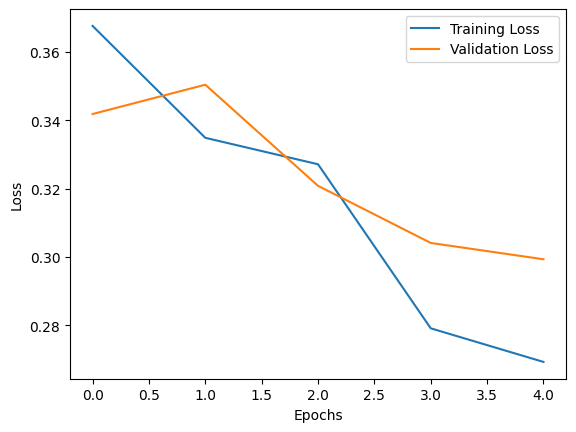

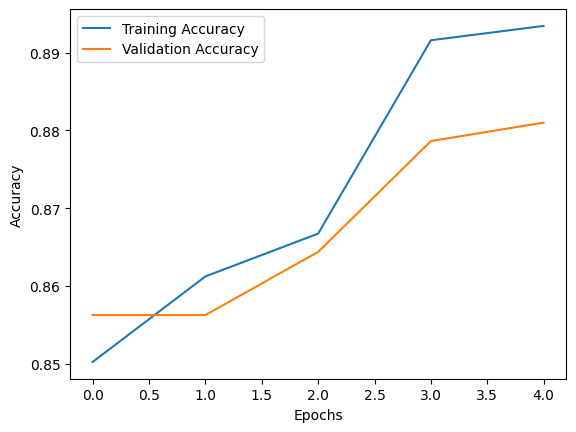

In [38]:
import matplotlib.pyplot as plt

#plotting the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#plotting the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Building a Predictive System


In [49]:
def predict_sentiment(review):
    # tokenize and pad the review
    sequence = tokenizer.texts_to_sequences([review])  # fix: texts_to_sequences (not text_to_sequences)
    padded_seq = pad_sequences(sequence, maxlen=300)

    # predict the sentiment
    prediction = model.predict(padded_seq, verbose=0)  # optional: silence the output
    sentiment = 'positive' if prediction[0][0] > 0.5 else 'negative'
    return sentiment

In [50]:
#example

new_review = 'this movie was greatt, i loved it'
sentiment = predict_sentiment(new_review)
print(f'The sentiment of the review is: {sentiment}')

The sentiment of the review is: positive


In [43]:
#example

new_review = 'this movie was weird, i did not like it'
sentiment = predict_sentiment(new_review)
print(f'The sentiment of the review is: {sentiment}')

The sentiment of the review is: negative


In [45]:
#example

new_review = 'this movie was average, not so good'
sentiment = predict_sentiment(new_review)
print(f'The sentiment of the review is: {sentiment}')

The sentiment of the review is: negative


In [46]:
#example

new_review = 'i liked the robot movie, it was good'
sentiment = predict_sentiment(new_review)
print(f'The sentiment of the review is: {sentiment}')

The sentiment of the review is: positive
